In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Librerias

In [ ]:
import re, string, unicodedata
import numpy as np
import pandas as pd
import pickle
import collections

import nltk
from nltk import word_tokenize
from nltk import download
from nltk.corpus import stopwords


%pip install stanza
import stanza


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.3/691.3 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=6b69ba5b426eb5befda32f86ef2ceac9bd42179d1921a9bd66bda6dd359f3720
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
download('stopwords')
download('punkt')
stanza.download('es')
nlp = stanza.Pipeline('es')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


INFO:stanza:Downloading default packages for language: es (Spanish) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: es (Spanish):
| Processor    | Package  |
---------------------------
| tokenize     | ancora   |
| mwt          | ancora   |
| pos          | ancora   |
| lemma        | ancora   |
| depparse     | ancora   |
| sentiment    | tass2020 |
| constituency | combined |
| ner          | conll02  |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: constituency
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 40.5 MB/s eta 0:00:00


In [ ]:
def eliminar_textos_basura(texto):
    # eliminar emojis: elimina todo lo que este en <>. 
    texto_procesado = re.sub('<.*?>', ' ', texto)
    # convertir a minusculas
    texto_procesado = texto_procesado.lower()
    # remover @usuario
    texto_procesado = re.sub('@[^\s]+',' ',texto_procesado)
    # remover RT
    texto_procesado = re.sub('rt   ',' ',texto_procesado)
    texto_procesado = re.sub('rt',' ',texto_procesado)
    texto_procesado = re.sub('rt ',' ',texto_procesado)
    # remover numeros
    texto_procesado = re.sub("\d+", "", texto_procesado)
    # texto_procesado = re.sub(r'http\S+', ' ', texto_procesado)
    texto_procesado = re.sub("(\w+:\/\/\S+)", " ", texto_procesado)
    # reemplazar todos los caracteres que no saen alfanuméricos con espacios
    texto_procesado = re.sub(r'[^a-zA-Z0-9ÑñÁáÉéÍíÓóÚú\s]', ' ', texto_procesado)
    
    return texto_procesado

def eliminar_stop_words(texto):
    # obtener lista de stopwords
    stop_words = set(stopwords.words('spanish')) 
    stop_words.remove('no')
    #separar el texto por palabras
    palabras = word_tokenize(texto) 
    # dejar solo palabras que no sean stopwords
    texto_sin_sw = [w for w in palabras if not w in stop_words] 
    #  convertir en una sola cadena la lista de palabras
    texto_sin_sw = ' '.join(texto_sin_sw)

    return texto_sin_sw 

def remove_non_ascii(word):
    """Remueve caracteres no ASCII"""
    new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    return new_word

def establecer_lema(text):
  doc = nlp(text)
  new = ''
  for sent in doc.sentences:
    for word in sent.words:
      new = new + word.lemma
      new = new + ' '

  return new

#Convierto cada tweet del dataset en un vector de palabras
from nltk import word_tokenize
def ConvertirData(corpusBase):
  textos = []
  for y in [corpusBase['text'][i] for i in range(len(corpusBase))]:
      doc = word_tokenize(y)
      textos.append(doc)
  return textos

def convertirDataBert(data):
  comments = []
  for line in DataFinal['text']:
      comments.append(str(line).split(' '))
  return comments

In [ ]:
def Knn(matriz, k):
  labels = matriz[2]
  Matriz = matriz[0]
  tweet = matriz[1]
  pred_label = []
  etiquetar = []
  indice = 0
  for x in labels:
      if(indice != len(labels)-1):
        if(Matriz[indice]<=0.20): #Filtro que asigan directament 0 cuando el valor de comparacion sera cero o menor a cero
          etiquetar.append((Matriz[indice], 0, tweet[indice]))
        else:
          etiquetar.append((Matriz[indice], labels[indice],tweet[indice]))
      indice += 1
  etiquetar.sort(reverse=True)
  neighbors = etiquetar[:k]
  votes = []
  for neighbor in neighbors:
            votes.append(neighbor[1])
  counter = collections.Counter(votes) #Determina el que mas se repite
  pred_label.append(counter.most_common()[0][0])
  return pred_label

def EtiquetaEnTexto(valor):
  if valor[0]==1:
    return 'emergencia'
  else:
    return 'no emergencia'

In [ ]:
def ProcesarTweet(Tweet):
  Procesado = eliminar_textos_basura(Tweet)
  Procesado = eliminar_stop_words(Procesado)
  Procesado = remove_non_ascii(Procesado)
  Procesado = establecer_lema(Procesado)
  return Procesado

RECURSO

In [ ]:
DataFinal = pd.read_excel('/content/gdrive/My Drive/ART_EMERGENCY/GLOVE_CODIGO/4DataFinalLemaFiltro.xlsx')

CREACIÓN DEL MODELO 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import transformers
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset

In [ ]:
'''
Función que recibira el tweet para generar las comparaciones con los tweets de la data en base al modelo
'''
def modeloBert(tweet):
  Tweet = ProcesarTweet(tweet) #Se Preprocesa el tweet y se tokeniza el texto
  #Tweet = tweet
  if len(Tweet.split()) <= 2: #Se valida que el tweet preprocesado tenga un minino de palabras
    Tweet = 'falso'  #Se le asigna el texto 'vacio' el cual sera detectado como no emergencia
  
  test_inputs = tokenizer.batch_encode_plus([Tweet], max_length=512, truncation=True, pad_to_max_length=True, return_attention_mask=True, return_tensors="pt")

    # Crea los conjuntos de datos de entrenamiento y prueba
  test_dataset = TensorDataset(test_inputs["input_ids"], test_inputs["attention_mask"])

    # Crea los data loaders
  test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset))

  sim = []
  text = []
  label = []
  valores = DataFinal.to_numpy()

  for i in valores:
    test_inputs2 = tokenizer.batch_encode_plus([i[0]], max_length=512, truncation=True, pad_to_max_length=True, return_attention_mask=True, return_tensors="pt")
    test_dataset2 = TensorDataset(test_inputs2["input_ids"], test_inputs2["attention_mask"])
    test_dataloader2 = DataLoader(test_dataset2, sampler=SequentialSampler(test_dataset2))
    
    for batch in test_dataloader:
      val_tweet = batch[0].numpy()
    
    for line in test_dataloader2:
      val = line[0].numpy()
      similarity = (val[0] @ val_tweet[0]) / (np.linalg.norm (val[0]) * np.linalg.norm (val_tweet[0])) 
      sim.append(similarity)
      text.append(i[0])
      label.append(i[1])

  return sim, text, label 
  
  sim = []
  #Extraer el vector
  for batch in test_dataloader:
    val_tweet = batch[0].numpy()

  for line in train_dataloader:
    val = line[0].numpy()
    similarity = (val[0] @ val_tweet[0]) / (np.linalg.norm (val[0]) * np.linalg.norm (val_tweet[0])) 
    sim.append(similarity)

  
  return sim

In [ ]:
'''
Determina la etiqueta del nuevo tweet por cada knn establecido
'''
def EtiquetarModelBert(tweet):
  Similaridad= modeloBert(tweet)
  k_1 = Knn(Similaridad, 1)
  k_3 = Knn(Similaridad, 3)
  k_5 = Knn(Similaridad, 5)
  k_7 = Knn(Similaridad, 7)
  k_9 = Knn(Similaridad, 9)
  k_11 = Knn(Similaridad, 11)
  print('avanzo tweet')
  return k_1, k_3, k_5, k_7, k_9, k_11 

In [ ]:
EtiquetarModelBert('Ha sucedido un accidente de transito, se observan heridos #Alerta')

[(0.9725565589607442, 0.0, 'pais mameluco asalto '), (0.9714054194986469, 0.0, 'vivir vivir experiencia no accidente '), (0.9473600381675389, 0.0, 'telegrafo incendio encontrar controlar momento '), (0.9339000895368825, 0.0, 'conocer persona ayuda amor gasto '), (0.925379064569432, 0.0, 'permitir pasar siguiente nivel violacion muerte '), (0.9249248946125939, 1.0, 'registro accidente transito portete '), (0.9171236985751062, 1.0, 'accidente collo urgente '), (0.9153761757757167, 0.0, 'victima faltar empatia '), (0.9137236707612826, 1.0, 'registro accidente transito cerca norte '), (0.9125192003778129, 0.0, 'aun muerto merecer paliza '), (0.9108628618504526, 0.0, 'egas caida ano '), (0.9064775384435984, 0.0, 'hogar formado muerte este ano no '), (0.9027369313115615, 1.0, 'esperar ambulancia paciente morir '), (0.9017972553884404, 0.0, 'parecer asi caida bolsa mundo '), (0.9011845193025602, 0.0, 'priorizar necesidad urgente vida muerte '), (0.9004685971244345, 0.0, 'caida terraza bombazo

([0.0], [0.0], [0.0], [0.0], [0.0], [0.0])

In [ ]:
'''
En consideración a que el modelo cada que se crea genera resultados diferentes, se establece la creación de 12 variantes 
'''
train_data=DataFinal

# Tokeniza la data y convierte a ids
tokenizer = transformers.AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
train_inputs = tokenizer.batch_encode_plus(train_data["text"].tolist(), max_length=512, truncation=True, pad_to_max_length=True, return_attention_mask=True, return_tensors="pt")
train_labels = torch.tensor(train_data["tipo"].tolist())


# Crea los conjuntos de datos de entrenamiento y prueba
train_dataset = TensorDataset(train_inputs["input_ids"], train_inputs["attention_mask"], train_labels)

# Crea los data loaders
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset))



Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


PRUEBAS DE LAS VARIANTES DEL MODELO

In [ ]:
import pandas as pd
import numpy as np
import collections
from sklearn import datasets, metrics

def EmplearMetricasDeValidacion(DataPrueba, Modelo, columnas):
  metric1 = []
  metric2 = []
  metric3 = []
  metric4 = []
  metric5 = []

  re = GenerarResultadosModelo(DataPrueba, Modelo)
  #k1
  metric1.append(metrics.accuracy_score(re[0], re[1]))
  metric2.append(metrics.precision_score(re[0], re[1]))
  metric3.append(metrics.recall_score(re[0], re[1]))
  #metric4.append(metrics.f1_score(re[0], re[1]))
  metric5.append(metrics.log_loss(re[0], re[1]))
  #k3
  metric1.append(metrics.accuracy_score(re[0], re[2]))
  metric2.append(metrics.precision_score(re[0], re[2]))
  metric3.append(metrics.recall_score(re[0], re[2]))
  #metric4.append(metrics.f1_score(re[0], re[2]))
  metric5.append(metrics.log_loss(re[0], re[2]))
  #k5
  metric1.append(metrics.accuracy_score(re[0], re[3]))
  metric2.append(metrics.precision_score(re[0], re[3]))
  metric3.append(metrics.recall_score(re[0], re[3]))
  #metric4.append(metrics.f1_score(re[0], re[3]))
  metric5.append(metrics.log_loss(re[0], re[3]))
  #k7
  metric1.append(metrics.accuracy_score(re[0], re[4]))
  metric2.append(metrics.precision_score(re[0], re[4]))
  metric3.append(metrics.recall_score(re[0], re[4]))
  #metric4.append(metrics.f1_score(re[0], re[4]))
  metric5.append(metrics.log_loss(re[0], re[4]))

  #k9
  metric1.append(metrics.accuracy_score(re[0], re[5]))
  metric2.append(metrics.precision_score(re[0], re[5]))
  metric3.append(metrics.recall_score(re[0], re[5]))
  #metric4.append(metrics.f1_score(re[0], re[5]))
  metric5.append(metrics.log_loss(re[0], re[5]))

  #k11
  metric1.append(metrics.accuracy_score(re[0], re[6]))
  metric2.append(metrics.precision_score(re[0], re[6]))
  metric3.append(metrics.recall_score(re[0], re[6]))
  #metric4.append(metrics.f1_score(re[0], re[6]))
  metric5.append(metrics.log_loss(re[0], re[6]))

  resultado=[metric1,metric2,metric3,metric5]

  Final = pd.DataFrame(resultado,columns=columnas)
  Final.insert(0,"METRICAS VALIDACION",['ACURRACY_SCORE','PRECISIÓN_SCORE','RECALL_SCORE','LOG_LOSS'],True)
  
  return Final

def GenerarResultadosModelo(DataN, modelo):
  Data = DataN
  Reemplazo = Data['tipo'].replace(['emergencia'], 1).replace(['no emergencia'], 0)
  Data['tipo'] = Reemplazo
  text = list(Data['New_Tweet'])
  
  prediccion1 = []
  prediccion2 = []
  prediccion3 = []
  prediccion4 = []
  prediccion5 = []
  prediccion6 = []

  for a in text:
    metodo= modelo(a)
    prediccion1.append(metodo[0])
    prediccion2.append(metodo[1])
    prediccion3.append(metodo[2])
    prediccion4.append(metodo[3])
    prediccion5.append(metodo[4])
    prediccion6.append(metodo[5])
  test_final = list(Data['tipo'])

  return  test_final, prediccion1, prediccion2, prediccion3, prediccion4, prediccion5, prediccion6 

In [ ]:
#Generar Reportes que contengan los resultados de las metricas de validación de cada una de las variantes del modelo
import pickle
DataNivelada = pd.read_excel('/content/gdrive/My Drive/ART_EMERGENCY/GLOVE_CODIGO/New_DataPrueba_Total.xlsx')

Data = []

BERT = EmplearMetricasDeValidacion(DataNivelada, EtiquetarModelBert, ['bert_1','bert_3','bert_5','bert_7','bert_9','bert_11'])

Data.append(BERT)

In [ ]:
Data[0]

,METRICAS VALIDACION,bert_1,bert_3,bert_5,bert_7,bert_9,bert_11
0,ACURRACY_SCORE,0.535000,0.523750,0.542500,0.557500,0.547500,0.540000
1,PRECISIÓN_SCORE,0.512748,0.500000,0.520548,0.538244,0.527221,0.518732
2,RECALL_SCORE,0.475066,0.469816,0.498688,0.498688,0.482940,0.472441
3,LOG_LOSS,16.060703,16.449271,15.801665,15.283571,15.628961,15.888004


In [ ]:
Data[0].to_excel('Verificacion_Modelo_BERT_1.xlsx', index=False)
!cp Verificacion_Modelo_BERT_1.xlsx '/content/gdrive/My Drive/ART_EMERGENCY/BERT_CODIGO/ANALIZAR/'

Análisis de Resultados para determinar la mejor variante del Modelo




GENERAR CURVA

In [ ]:
#LIBRERIAS
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
re_Bert = GenerarResultadosModelo(DataNivelada, EtiquetarModelBert)


AUC - Test Set: 54.05%


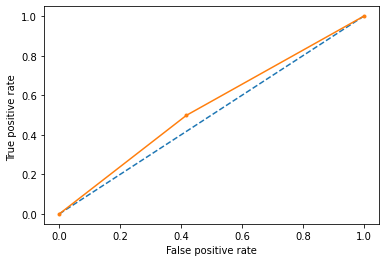

In [ ]:
y_test = re_Bert[0]
y_pred = re_Bert[3]

auc = roc_auc_score(y_test, y_pred)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate ')
# show the plot
plt.show()

In [ ]:
df = pd.DataFrame()
df['tweet'] = DataNivelada['New_Tweet']
df['k1'] = re_Glove[1]
df['k3'] = re_Glove[2]
df['k5'] = re_Glove[3]
df['k7'] = re_Glove[4]
df['k9'] = re_Glove[5]
df['k11'] = re_Glove[6]

In [ ]:
df.to_excel('Verificacion_Anotadores.xlsx', index=False)
!cp Verificacion_Anotadores.xlsx '/content/gdrive/My Drive/ART_EMERGENCY/BERT_CODIGO/ANALIZAR/'